In [1]:
import os
import logging
import sys
import torch
from torch import device
from torch import FloatTensor
from torch.nn import BCELoss
from torch.optim import SGD
from torch.optim import Adamax
from torch.optim import Adadelta
from torch.optim import ASGD
from torch.optim import Adagrad
from torch.optim import RMSprop
import random
from torch import nn
from torch.cuda import is_available as is_cuda_avalible
import re
import glob
#import dlib
import os
import numpy
import torch.nn.functional as F
from matplotlib import pyplot as plt
import itertools
import numpy as np
import random
from random import shuffle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
def plot_confusion_matrix(cm, classes, f_size=16, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """
    #fig = plt.figure()
    #plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=f_size + 2)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=f_size - 6)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=f_size)
    plt.yticks(tick_marks, classes, fontsize=f_size)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print("Confusion matrix, without normalization")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=f_size)
    plt.tight_layout()
    plt.ylabel('True class', fontsize=f_size + 1)
    plt.xlabel('Predicted class', fontsize=f_size + 1)
    plt.show()

In [3]:
df = pd.read_csv('train_distanse.csv', delimiter=',')
X = df.iloc[:,1:69]
y = df['mood.value']
y = y.astype('int')

df_test = pd.read_csv('test_distance.csv', delimiter=',')
X_test = df_test.iloc[:,1:69]
y_test = df_test['mood.value']
y_test = y_test.astype('int')

In [4]:
tree = DecisionTreeClassifier(random_state=0)

params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'max_depth': [None, 8, 10, 12, 14, 16, 18, 20]

}
tclf = GridSearchCV(tree, params, scoring='f1_macro', verbose=3, n_jobs=-1)
y=y.astype('int')
tclf.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 5, 10]},
             scoring='f1_macro', verbose=3)

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.82      0.70      0.76        20
           2       0.47      0.35      0.40        20
           3       0.67      0.80      0.73        20
           4       0.86      0.90      0.88        20
           5       0.60      0.60      0.60        20
           6       0.33      0.35      0.34        20

    accuracy                           0.61       140
   macro avg       0.61      0.61      0.61       140
weighted avg       0.61      0.61      0.61       140



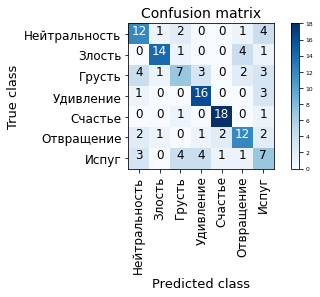

In [5]:
print(classification_report(y_test, tclf.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, tclf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [6]:
params = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3, 5, 10],
    'max_depth': [None, 8, 10, 12, 14, 16, 18, 20]

}

rfc = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rfc, params, scoring='f1_macro', verbose=3, n_jobs=-1)
clf.fit(X, y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1;, score=0.633 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=3;, score=0.667 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=10;, score=0.637 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=2;, score=0.631 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=5;, score=0.677 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=10;, score=0.632 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2;, score=0.683 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.674 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.636 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=3;, score=0.65

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 500, 1000]},
             scoring='f1_macro', verbose=3)

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.86      0.90      0.88        20
           2       0.57      0.65      0.60        20
           3       0.72      0.90      0.80        20
           4       0.95      0.95      0.95        20
           5       0.89      0.85      0.87        20
           6       0.71      0.50      0.59        20

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.75       140
weighted avg       0.76      0.76      0.75       140



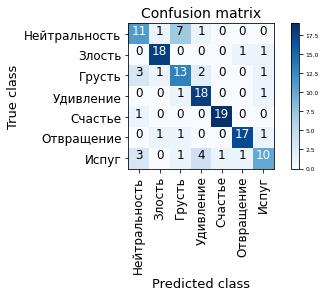

In [7]:
print(classification_report(y_test, clf.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, clf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [8]:
bbc = BaggingClassifier(DecisionTreeClassifier(), random_state=0)
params = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 1000],
          'bootstrap': [False, True],
          'max_samples': [1, 2, 3, 5, 10]
          }
bgc = GridSearchCV(bbc, params, scoring='f1_macro', verbose=3, n_jobs=-1)
bgc.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=2;, score=0.653 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=5;, score=0.665 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=1;, score=0.503 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=3;, score=0.504 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=10;, score=0.510 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2;, score=0.649 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.527 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=1;, score=0.659 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5;, score=0.527 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=10;, score=0.673 tot

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_samples': [1, 2, 3, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          1000]},
             scoring='f1_macro', verbose=3)

              precision    recall  f1-score   support

           0       0.34      0.55      0.42        20
           1       0.92      0.55      0.69        20
           2       0.40      0.10      0.16        20
           3       0.63      0.85      0.72        20
           4       0.60      0.90      0.72        20
           5       0.62      0.65      0.63        20
           6       0.38      0.25      0.30        20

    accuracy                           0.55       140
   macro avg       0.56      0.55      0.52       140
weighted avg       0.56      0.55      0.52       140



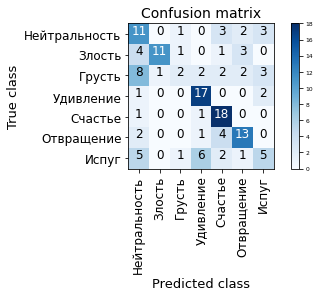

In [9]:
print(classification_report(y_test, bgc.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, bgc.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [10]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

params = {'loss': ['squared_hinge', 'hinge'],
          'penalty': ['l2', 'l1'],
          'dual': [False, True],
          'random_state': [0, 20, 42, 100],
          'multi_class': ['ovr', 'crammer_singer'],
          'max_iter': [500, 1000, 1500, 2000]
}

tsvc = GridSearchCV(svc, params, scoring='f1_macro', verbose=3, n_jobs=-1)
tsvc.fit(X, y)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=10, n_estimators=200;, score=0.729 total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=10, n_estimators=500;, score=0.606 total time=   3.3s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, n_estimators=50;, score=0.776 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, n_estimators=100;, score=0.796 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, n_estimators=150;, score=0.766 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, n_estimators=200;, score=0.609 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=1, n_estimators=500;, score=0.802 total time=   3.9s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=2, n_estimators=50;, score=0.603 total time=   0.4s
[CV 1/5] E

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/opt/homebrew/Caskroo

GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'dual': [False, True],
                         'loss': ['squared_hinge', 'hinge'],
                         'max_iter': [500, 1000, 1500, 2000],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l2', 'l1'],
                         'random_state': [0, 20, 42, 100]},
             scoring='f1_macro', verbose=3)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.83      0.95      0.88        20
           2       0.79      0.75      0.77        20
           3       0.70      0.95      0.81        20
           4       0.91      1.00      0.95        20
           5       0.86      0.95      0.90        20
           6       1.00      0.50      0.67        20

    accuracy                           0.83       140
   macro avg       0.85      0.83      0.82       140
weighted avg       0.85      0.83      0.82       140



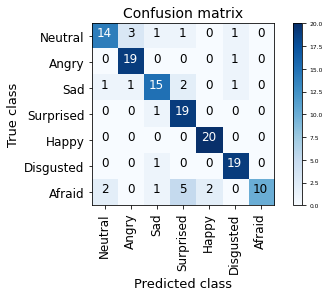

In [11]:
print(classification_report(y_test, tsvc.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, tsvc.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Neutral', 'Angry', 'Sad', 'Surprised', 'Happy', 'Disgusted', 'Afraid'], f_size=12)
#happy, angry, afraid, disgusted, sad, surprised

In [ ]:
xgb = XGBClassifier(n_jobs=-1)

params = {
          'max_depth': [2, 4, 6, 50, 100, 20]
}

txgb = GridSearchCV(xgb, params, scoring='f1_macro', verbose=3, n_jobs=-1)

txgb.fit(X, y)

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.86      0.95      0.90        20
           2       0.68      0.65      0.67        20
           3       0.82      0.90      0.86        20
           4       0.95      0.95      0.95        20
           5       0.90      0.90      0.90        20
           6       0.74      0.70      0.72        20

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.81      0.81      0.81       140



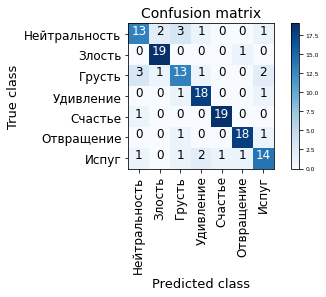

In [13]:
print(classification_report(y_test, txgb.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, txgb.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
params = {
    'n_estimators': [25, 100, 500],
    'min_samples_leaf': [1, 2],
    'max_depth': [8, 20],
    'min_samples_split': [1, 5],
}
ggb_clf = GridSearchCV(gb_clf, params, scoring='f1_macro', verbose=3, n_jobs=-1)

ggb_clf.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 5],
                         'n_estimators': [25, 100, 500]},
             scoring='f1_macro', verbose=3)

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       1.00      0.90      0.95        20
           2       0.59      0.65      0.62        20
           3       0.86      0.90      0.88        20
           4       0.90      0.95      0.93        20
           5       0.84      0.80      0.82        20
           6       0.74      0.70      0.72        20

    accuracy                           0.79       140
   macro avg       0.80      0.79      0.79       140
weighted avg       0.80      0.79      0.79       140



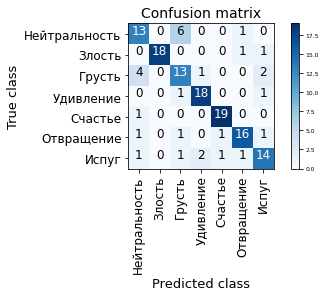

In [15]:
print(classification_report(y_test, ggb_clf.best_estimator_.predict(X_test)))
conf_matr = confusion_matrix(y_test, ggb_clf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [16]:
tsvc.best_params_

{'dual': True,
 'loss': 'squared_hinge',
 'max_iter': 1500,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0}

In [17]:
clf1 = GradientBoostingClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
clf2 = XGBClassifier(max_depth=4)
clf3 = LinearSVC(dual=True, loss='squared_hinge', max_iter=1500, multi_class='ovr', penalty='l2', random_state=0)
eclf1 = VotingClassifier(estimators=[('gb', clf1), ('xgb', clf2), ('lsvc', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:44] WARNING: /private/var/folders/8t/w_8kv55n25zdy7tz2vx3d7ww0000gn/T/pip-install-fpdca3o9/xgboost_f6516d9673424befa2d7714166bf19c0/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.95      0.95      0.95        20
           2       0.68      0.75      0.71        20
           3       0.75      0.90      0.82        20
           4       0.95      1.00      0.98        20
           5       0.90      0.90      0.90        20
           6       0.86      0.60      0.71        20

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.83       140
weighted avg       0.84      0.84      0.83       140



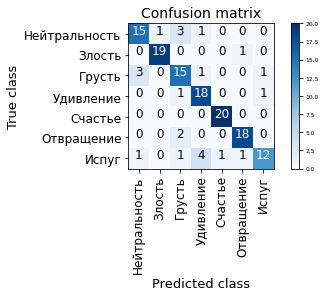

In [18]:
print(classification_report(y_test, eclf1.predict(X_test)))
conf_matr = confusion_matrix(y_test, eclf1.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)

In [ ]:
clf = StackingClassifier(estimators=[('gb', clf1), ('xgb', clf2), ('lsvc', clf3)])
clf.fit(X, y)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.90      0.95      0.93        20
           2       0.75      0.75      0.75        20
           3       0.86      0.95      0.90        20
           4       0.95      0.95      0.95        20
           5       0.86      0.95      0.90        20
           6       0.94      0.75      0.83        20

    accuracy                           0.86       140
   macro avg       0.87      0.86      0.86       140
weighted avg       0.87      0.86      0.86       140



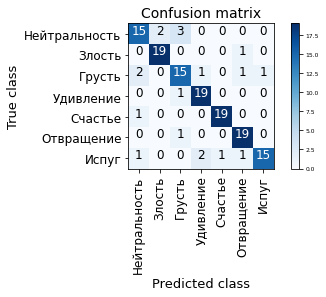

In [20]:
print(classification_report(y_test, clf.predict(X_test)))
conf_matr = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(conf_matr, ['Нейтральность', 'Злость', 'Грусть', 'Удивление', 'Счастье', 'Отвращение', 'Испуг'], f_size=12)